In [1]:
#filtering the data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pck
import pandas as pd
import mpld3
mpld3.enable_notebook()

In [4]:
fl = "C:\\Users\\bkbme\\Desktop\\Sneha_program\\CompNeuro\\data_exam.pck"
with open(fl, 'rb') as f:
    A = pck.load(f) 

time = A['trial0'] ['time']
signals = A['trial0'] ['signals'] 
target = A['trial0'] ['tar'] [0] [1] 

In [5]:
A

{'trial0': {'time': array([[-6.139000e-02, -6.039000e-02, -5.939000e-02, ...,  8.442053e+01,
           8.442153e+01,  8.442253e+01]]),
  'signals': array([[511.8999939 , 511.8999939 , 511.8999939 , ..., 543.79998779,
          543.79998779, 544.        ],
         [892.20001221, 892.20001221, 892.40002441, ..., 914.5       ,
          914.40002441, 914.29998779],
         [458.29998779, 458.29998779, 458.        , ..., 486.29998779,
          486.29998779, 486.29998779],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]]),
  'signalsName': ['0:time',
   '0:0:filt:none:l_x',
   '1:0:filt:none:l_y',
   '2:0:filt:none:r_x',
   '3:0:filt:none:r_y',
   '4:0:filt:none:px',
   '5:0:filt:none:py',
   '6:0

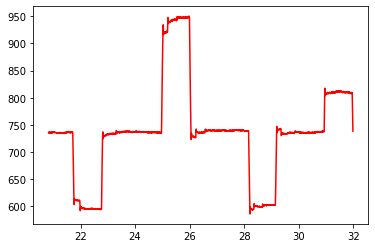

In [10]:
plt.plot(time[0,19300:30000], A['trial0']['signals'][0,19300:30000],'r')

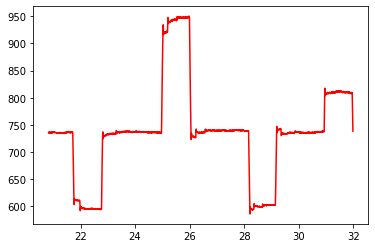

In [6]:
plt.plot(time[0,19300:30000], signals[0,19300:30000], 'r')

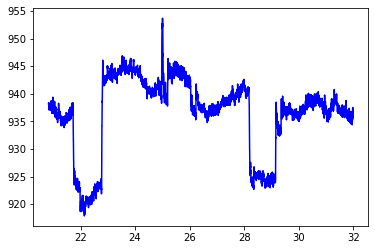

In [11]:
plt.plot(time[0,19300:30000], A['trial0']['signals'][1,19300:30000],'b')

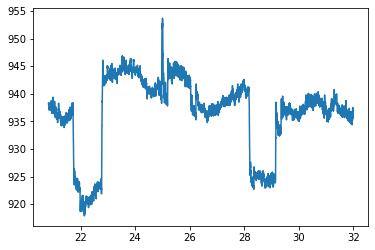

In [7]:
plt.plot(time[0,19300:30000], signals[1,19300:30000])

In [44]:
from scipy.signal import firwin, lfilter
# desin a FIR filter using the window method.It's a finite impulse response filter, which have linear phase
# Low pass filter designing
ntaps = 11 
cutoff = 0.01 #0.05 
b = firwin(ntaps, cutoff)

In [13]:
# 21sec (19470 time point) to 32sec (30012) signal is 12 sec data, which contain 10542 data points for 12 sec (i.e., 32-21) 
oriz_signal = signals[0,19300:30000]
vert_signal = signals[1,19300:30000]

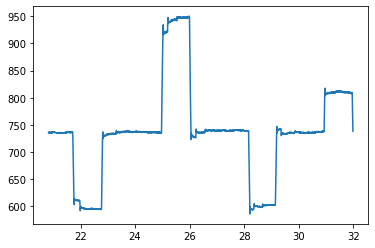

In [14]:
plt.plot(time[0,19300:30000], oriz_signal)

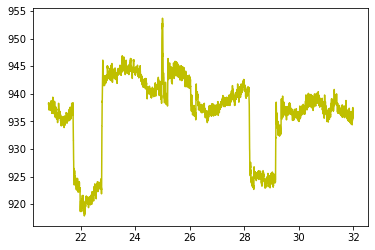

In [19]:
plt.plot(time[0,19300:30000], vert_signal, 'y')

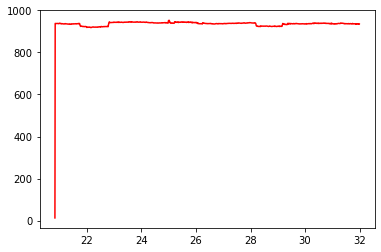

In [30]:
y_filtered = lfilter(b, 1.0, vert_signal)
plt.plot(time[0,19300:30000],y_filtered, 'r')

In [45]:
x_filtered= lfilter(b, 1.0,oriz_signal) 
%matplotlib qt
plt.plot(time[0,19300:30000], oriz_signal, 'b')

plt.plot(time[0,19300:30000], x_filtered, 'g')

In [46]:
from scipy.signal import medfilt

In [47]:
x_filtered_med = medfilt(oriz_signal, 33)

plt.plot(time[0,19300:30000],oriz_signal, 'b')

plt.plot(time[0,19300:30000],x_filtered_med, 'g')

In [48]:
y_filtered_med = medfilt(vert_signal, 101)
plt.plot(time[0,19300:30000],vert_signal, 'y')
plt.plot(time[0,19300:30000],y_filtered_med, 'r')

In [49]:
from scipy.signal import savgol_filter

In [50]:
x_savgol = savgol_filter(oriz_signal, 55, 6,)

plt.plot(time[0,19300:30000],oriz_signal, 'b')

plt.plot(time[0,19300:30000],x_savgol, 'g')

In [51]:
y_savgol = savgol_filter(vert_signal, 55, 6,)
plt.plot(time[0,19300:30000],vert_signal, 'y')
plt.plot(time[0,19300:30000],y_savgol, 'r')

In [52]:
plt.plot(time[0,19300:30000], oriz_signal, 'b')
plt.plot(time[0,19300:30000], x_filtered, 'g')
plt.plot(time[0,19300:30000], x_filtered_med, 'k')
plt.plot(time[0,19300:30000], x_savgol, 'y')

In [53]:
plt.axis([21,32,910,960])
plt.plot(time[0,19300:30000],vert_signal, 'y')
plt.plot(time[0,19300:30000],y_filtered, 'r')
plt.plot(time[0,19300:30000],y_filtered_med, 'k')
plt.plot(time[0,19300:30000],y_savgol, 'b')

In [54]:
err_base= oriz_signal
err_fir= oriz_signal - x_filtered
err_med= oriz_signal - x_filtered_med
err_savgol= oriz_signal - x_savgol

In [55]:
errBins = np.linspace(-0.9,0.9,51) 


_=plt.hist(err_med, errBins, color='r')
_=plt.hist(err_savgol, errBins, color='k')
_=plt.hist(err_fir, errBins, color='b')

In [56]:
print(np.mean(err_fir)) 
print(np.mean(err_med)) 
print(np.mean(err_savgol)) 

0.3478747518113817
0.031374443268109516
0.00011901928183506965


In [57]:
print(np.std(err_fir))
print(np.std(err_med)) 
print(np.std(err_savgol))

14.263851127514322
0.9543422784339299
0.4404848665353044
